# 🤖 Smart Campaign Analyzer — Predicting Personal Loan Acceptance

In this project, we predict which customers are likely to accept a **personal loan offer** based on campaign data.  
This helps banks **target the right audience**, save costs, and improve acceptance rates.


 **Goal**: Build a classification model that predicts personal loan acceptance using customer demographics and campaign responses.

**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

**Load Dataset**

In [2]:
# Load your marketing dataset (e.g., bank-marketing.csv)
df = pd.read_csv("bank-marketing.csv")

# Preview the data
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


**Clean & Encode Data**

In [3]:
# Identify categorical columns BEFORE mapping target
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Encode the target
df['deposit'] = df['deposit'].map({'yes': 1, 'no': 0})

# Identify object (categorical) columns (excluding 'deposit')
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Encode categorical columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Confirm encoding
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        11162 non-null  int64
 1   job        11162 non-null  int32
 2   marital    11162 non-null  int32
 3   education  11162 non-null  int32
 4   default    11162 non-null  int32
 5   balance    11162 non-null  int64
 6   housing    11162 non-null  int32
 7   loan       11162 non-null  int32
 8   contact    11162 non-null  int32
 9   day        11162 non-null  int64
 10  month      11162 non-null  int32
 11  duration   11162 non-null  int64
 12  campaign   11162 non-null  int64
 13  pdays      11162 non-null  int64
 14  previous   11162 non-null  int64
 15  poutcome   11162 non-null  int32
 16  deposit    11162 non-null  int64
dtypes: int32(9), int64(8)
memory usage: 1.1 MB


**Exploratory Data Analysis (EDA)**

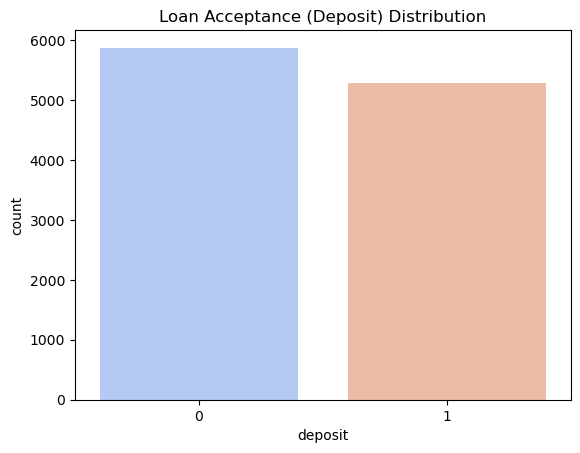

In [4]:
# Countplot of deposit (accepted loans)
sns.countplot(data=df, x='deposit', palette='coolwarm')
plt.title("Loan Acceptance (Deposit) Distribution")
plt.show()

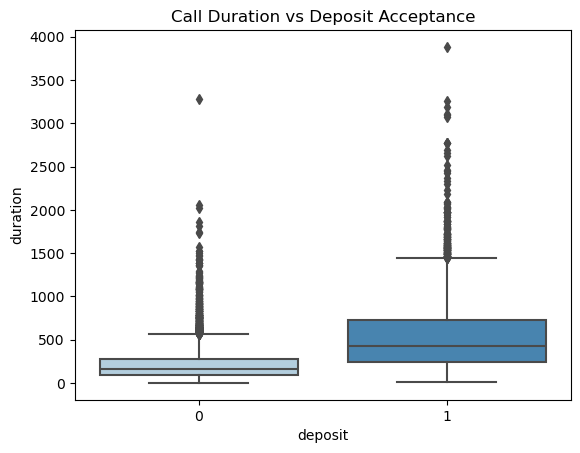

In [5]:
# Duration vs deposit (biggest influence in original dataset)
sns.boxplot(data=df, x='deposit', y='duration', palette='Blues')
plt.title("Call Duration vs Deposit Acceptance")
plt.show()

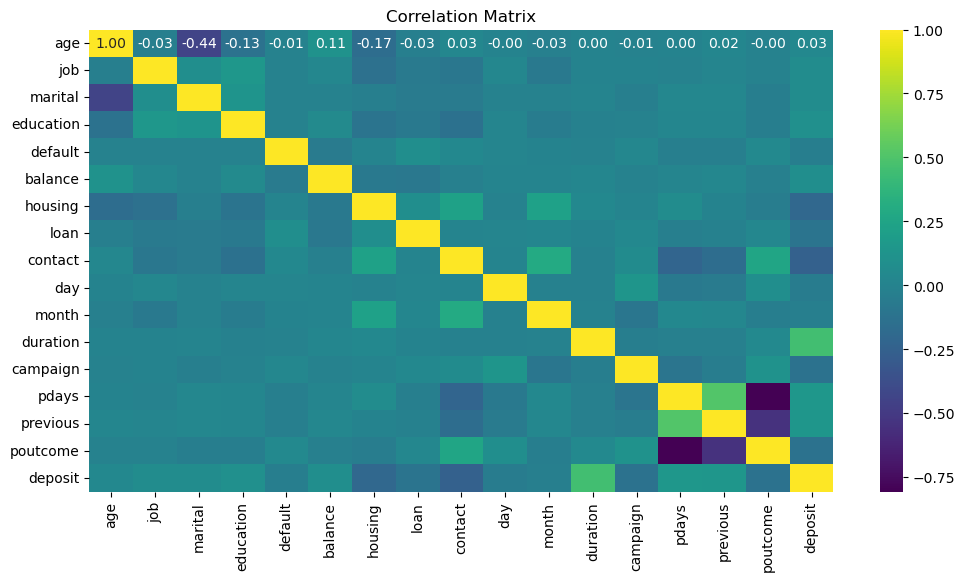

In [6]:
# Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='viridis')
plt.title("Correlation Matrix")
plt.show()

**Feature/Target Split**

In [7]:
X = df.drop('deposit', axis=1)
y = df['deposit']

**Train/Test Split & Model Training**

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

**Evaluation**

In [9]:
print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

 Accuracy: 0.8051948051948052

 Confusion Matrix:
 [[867 299]
 [136 931]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.74      0.80      1166
           1       0.76      0.87      0.81      1067

    accuracy                           0.81      2233
   macro avg       0.81      0.81      0.81      2233
weighted avg       0.81      0.81      0.80      2233



**Feature Importance Plot**

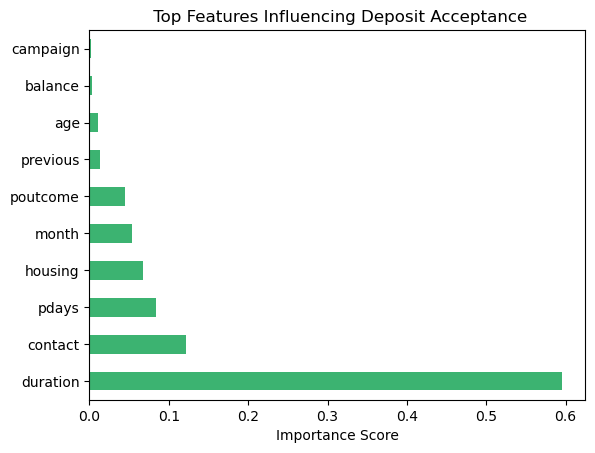

In [10]:
# Visualize important features
feat_importance = pd.Series(model.feature_importances_, index=X.columns)
feat_importance.nlargest(10).plot(kind='barh', color='mediumseagreen')
plt.title(" Top Features Influencing Deposit Acceptance")
plt.xlabel("Importance Score")
plt.show()